In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import torch

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

In [ ]:
experiments = pd.read_csv('Data/experiments.csv')

### Same ol Utilities

In [3]:
import numpy as np 

# TODO: Refactor all these functions to take into account that we also have abs spectra now

def _get_peaks(x, y):
    peaks = []
    th = 0.001
    for i in range(1, len(x)-1):
        if y[i] > y[i-1]+th and y[i] > y[i+1]+th:
            peaks.append((x[i], y[i]))
    return peaks

def get_peaks(x, y):
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 700)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return x1[np.argmax(y1)], x2[np.argmax(y2)]

def get_area_under_peaks(x, y, norm=None):
    if not norm:
        return np.trapz(y, x)
    
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 800)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return np.trapz(y1, x1)/norm, np.trapz(y2, x2)/norm

def process_spectrum(x, y, norm_area):
    peaks = get_peaks(x, y)
    areas = get_area_under_peaks(x, y, norm_area)
    return peaks, areas

def smooth_spectrum(x, y, window=4):
    y = np.array(y)
    y_smooth = np.zeros_like(y)
    for i in range(len(y)):
        if i < window:
            y_smooth[i] = np.mean(y[:i+window])
        elif i > len(y) - window:
            y_smooth[i] = np.mean(y[i-window:])
        else:
            y_smooth[i] = np.mean(y[i-window:i+window])
    return x, y_smooth.tolist()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

df = pd.read_csv('Data/fl_spectra_data.csv')
for group, df in df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']):
    axs[0, 0].plot(df['Wavelength(nm)'], df['Fluorescence'], label=group[0])
    axs[0, 1].plot(df['Wavelength(nm)'], df['Fluorescence_norm'], label=group[0])
plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.1),
          fancybox=True, shadow=True, ncol=5)

df = pd.read_csv('Data/abs_spectra_data.csv')
for group, df in df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']):
    axs[1, 0].plot(df['Wavelength(nm)'], df['Absorbance'], label=group[0])
    axs[1, 1].plot(df['Wavelength(nm)'], df['Absorbance_norm'], label=group[0])
plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

df = pd.read_csv('Data/fl_spectra_data.csv')
for group, df in df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']):
    if group[0] == '2_NPL-4_(6-1-22)' or group[0] == '1_NPL-4_(5-31-22)':
        axs[0, 0].plot(df['Wavelength(nm)'], df['Fluorescence'], label=f'Doping: {group[2]}')
        axs[0, 1].plot(df['Wavelength(nm)'], df['Fluorescence_norm'], label=f' Doping: {group[2]}')
        #add title to the first axis
        axs[0, 0].set_title('Absolute')
df = pd.read_csv('Data/abs_spectra_data.csv')
for group, df in df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']):
    if group[0] == '2_NPL-4_(6-1-22)' or group[0] == '1_NPL-4_(5-31-22)':
        axs[1, 0].plot(df['Wavelength(nm)'], df['Absorbance'], label=f' Doping: {group[2]}')
        axs[1, 1].plot(df['Wavelength(nm)'], df['Absorbance_norm'],label=f'Doping: {group[2]}')
        axs[0, 1].set_title('Normalized')
#put the legend outside the plot at the right side
plt.legend(loc='right')
#add a title to the plot
plt.suptitle('Fluorescence and Absorbance spectra for NPL-4 ', fontsize=18)

### See the Fluorescense Spectre of the original 50 complete raw points

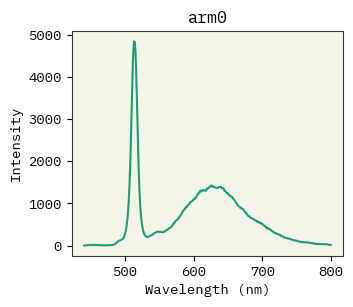

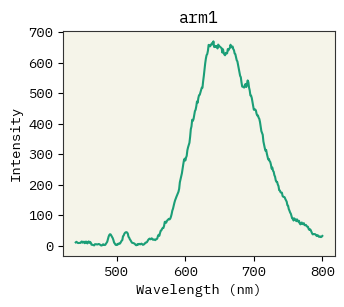

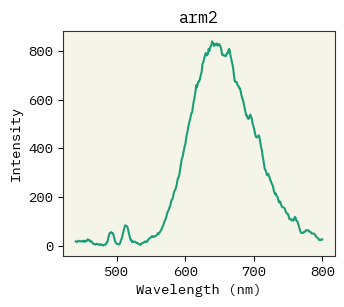

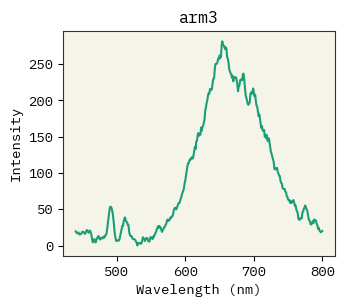

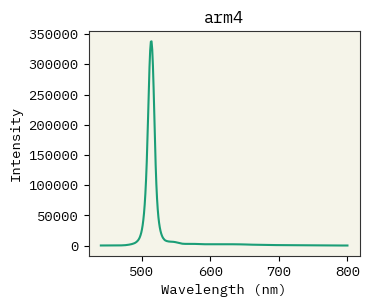

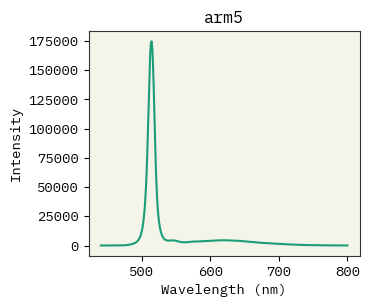

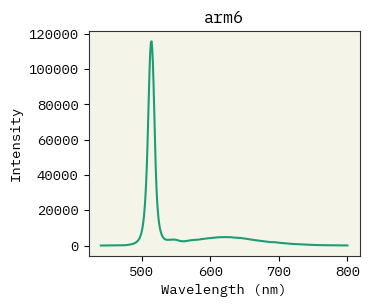

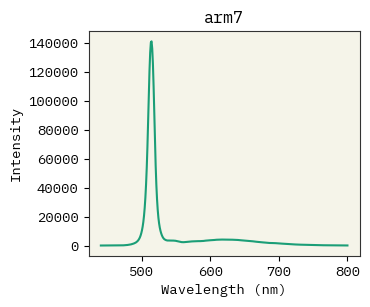

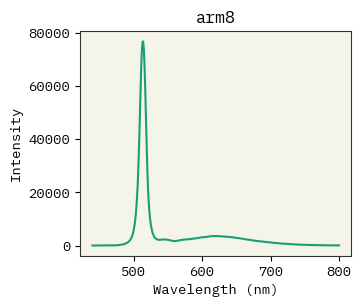

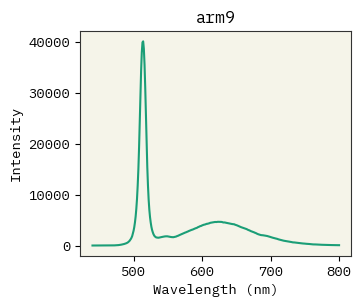

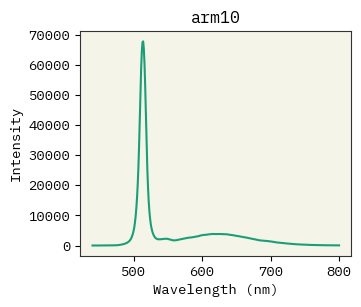

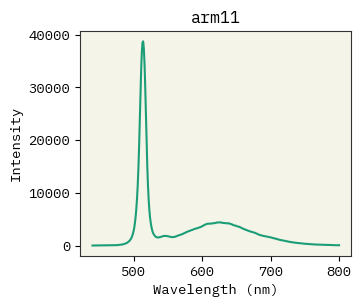

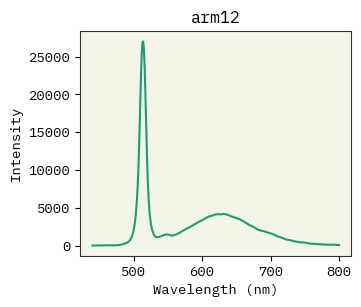

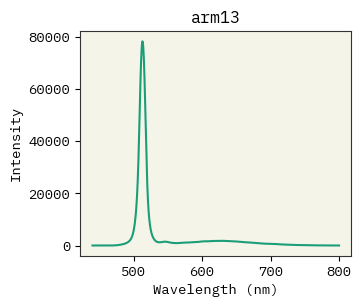

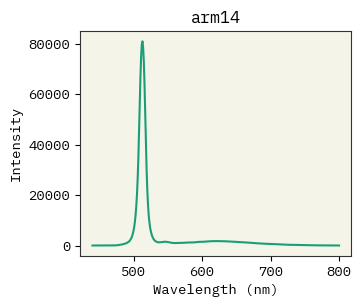

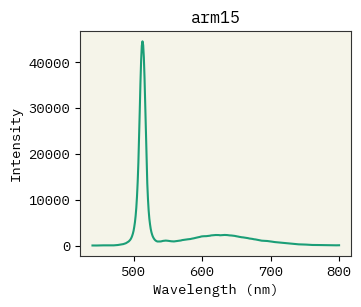

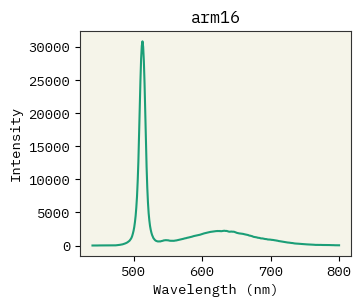

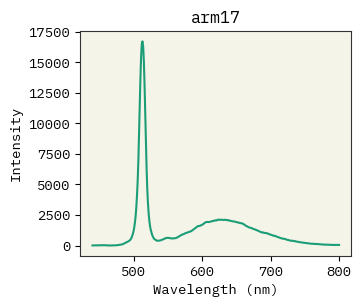

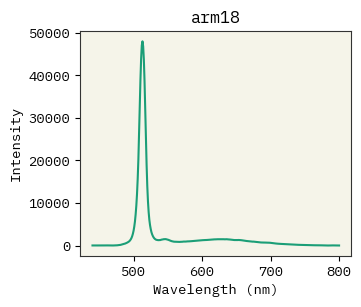

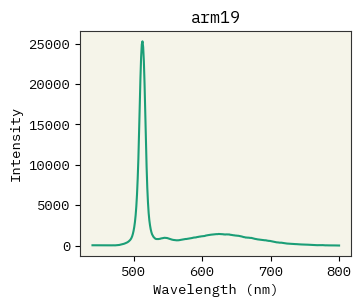

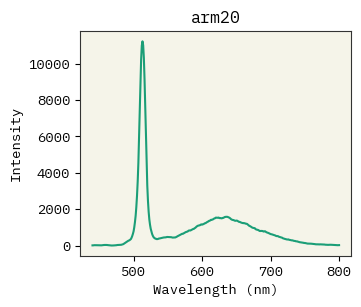

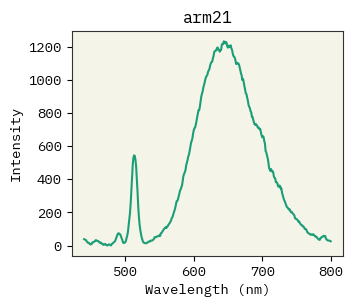

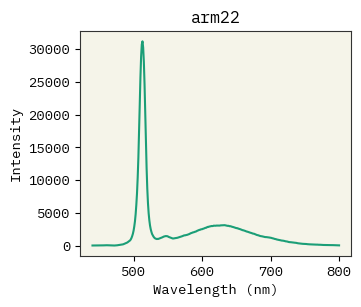

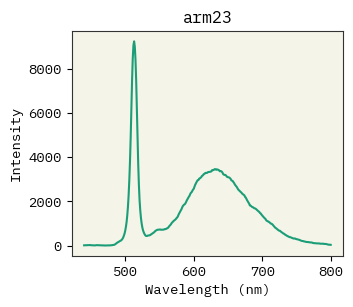

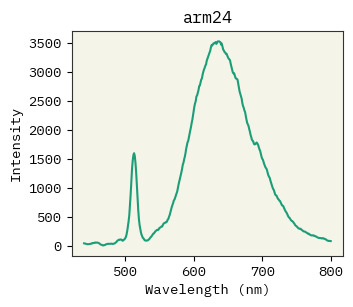

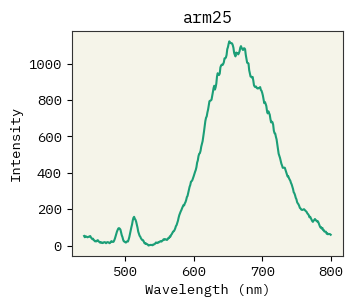

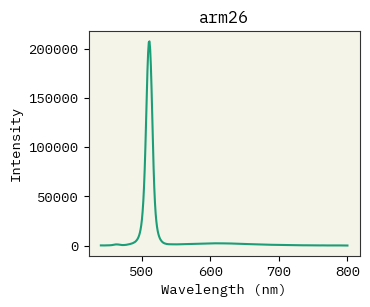

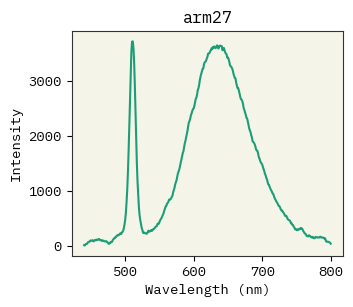

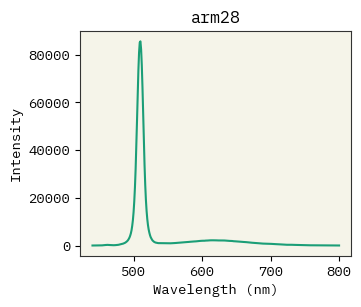

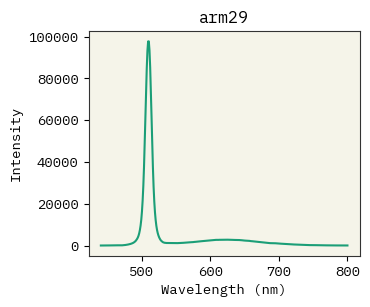

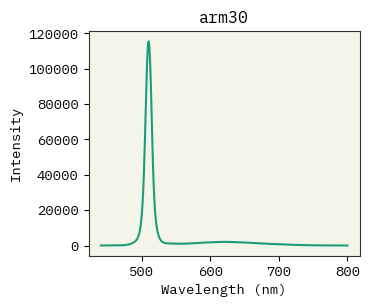

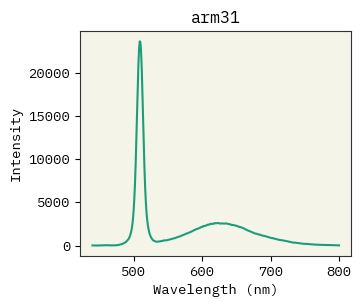

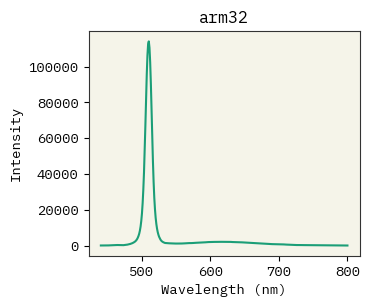

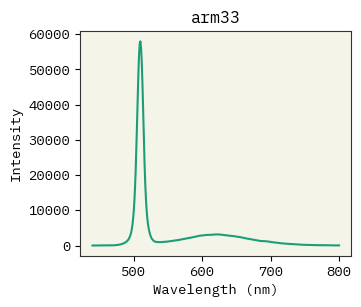

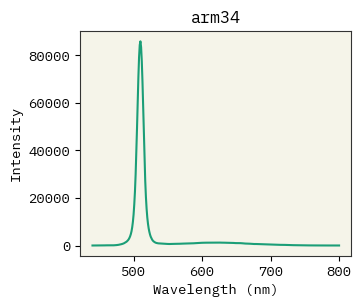

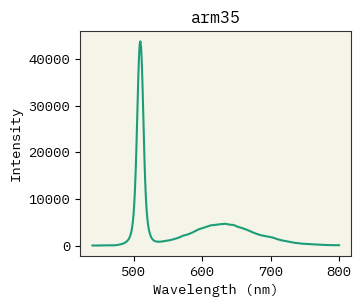

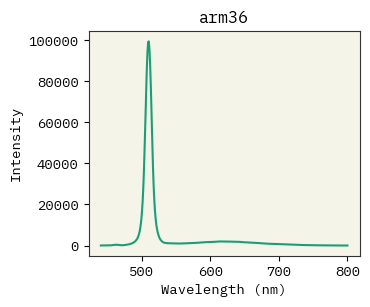

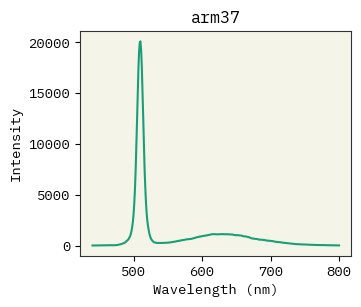

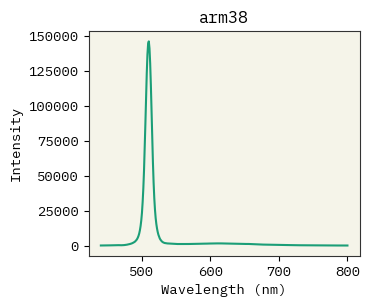

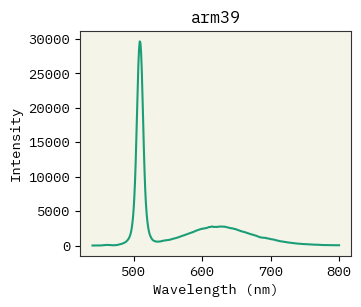

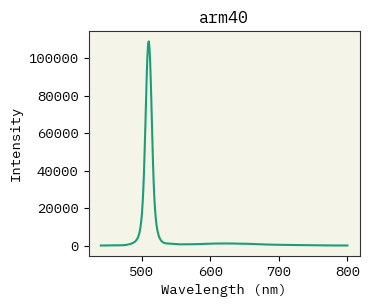

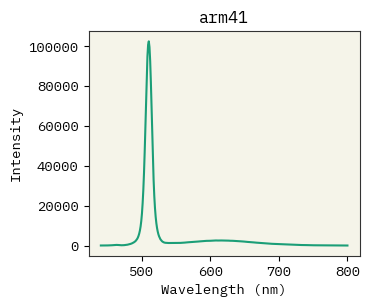

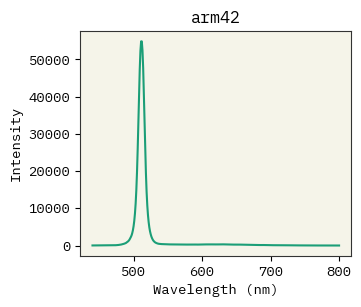

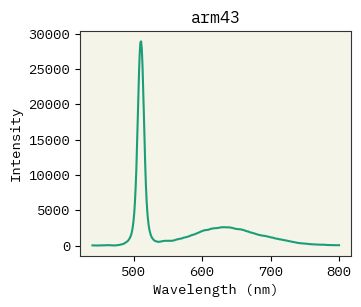

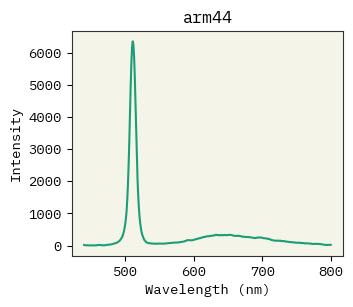

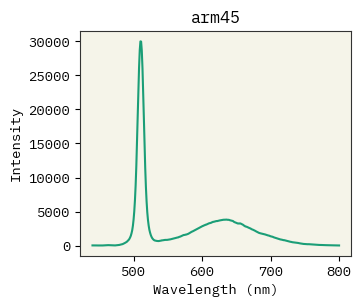

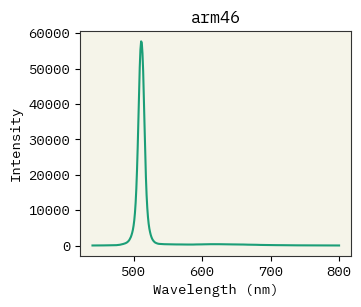

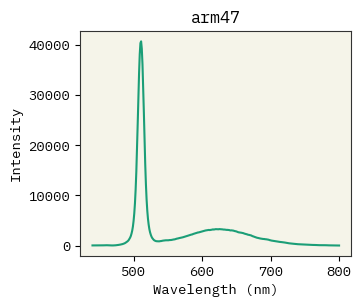

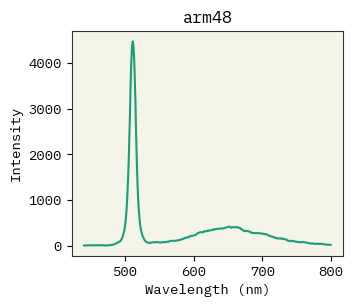

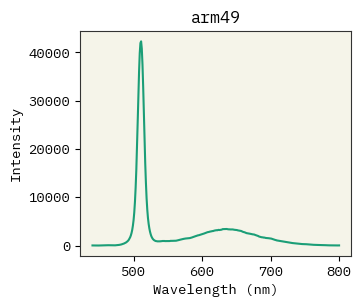

In [25]:
df = pd.read_csv('Data/processed_datawobaselinev4.csv')
df.drop(['OD'], axis=1, inplace=True)
df.groupby(['Temperature(C)', 'Doping(%)', 'Time(min)']).count()
for index in range(50):
    sample = df.iloc[index]
    w = [float(a) for a in sample['Fl_Wavelengths'][1:-1].split(',')]
    i = [float(a) for a in sample['Fluorescence'][1:-1].split(',')]
    # w = [float(a) for a in sample['Abs_Wavelengths'][1:-1].split(',')]
    # i = [float(a) for a in sample['Absorbance'][1:-1].split(',')]

    plt.plot(w, i, color="C0")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity")
    plt.title(f"arm{index}")
    # plt.ylabel("Absorbance")
    plt.show()


### Data analysis

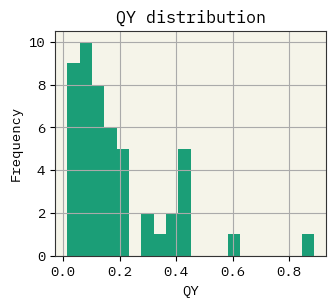

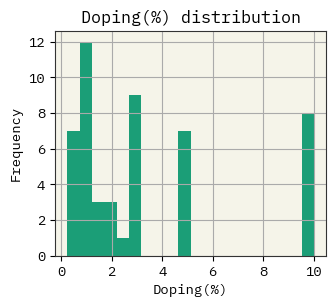

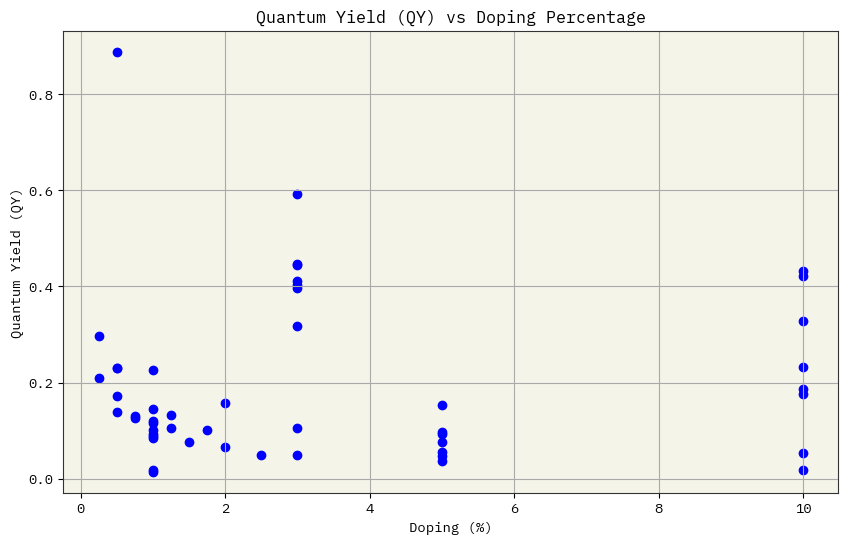

In [6]:
#plot doping percentage vs QY
#drop -1 values
df = pd.read_csv('Data/processed_datawobaselinev4.csv')
df.drop(['OD'], axis=1, inplace=True)
df = df[df['QY'] != -1]
df.groupby(['Temperature(C)', 'Doping(%)', 'Time(min)']).count()

df['QY'].hist(bins=20)

plt.xlabel("QY")
plt.ylabel("Frequency")
plt.title("QY distribution")
plt.show()
#plot doping(%) vs QY
df = pd.read_csv('Data/processed_datawobaselinev4.csv')
df.drop(['OD'], axis=1, inplace=True)
df = df[df['QY'] != -1]
df.groupby(['Temperature(C)', 'Doping(%)', 'Time(min)']).count()
df['Doping(%)'].hist(bins=20)
plt.xlabel("Doping(%)")
plt.ylabel("Frequency")
plt.title("Doping(%) distribution")
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df['Doping(%)'], df['QY'], color='blue')
plt.title('Quantum Yield (QY) vs Doping Percentage')
plt.xlabel('Doping (%)')
plt.ylabel('Quantum Yield (QY)')
plt.grid(True)
plt.show()

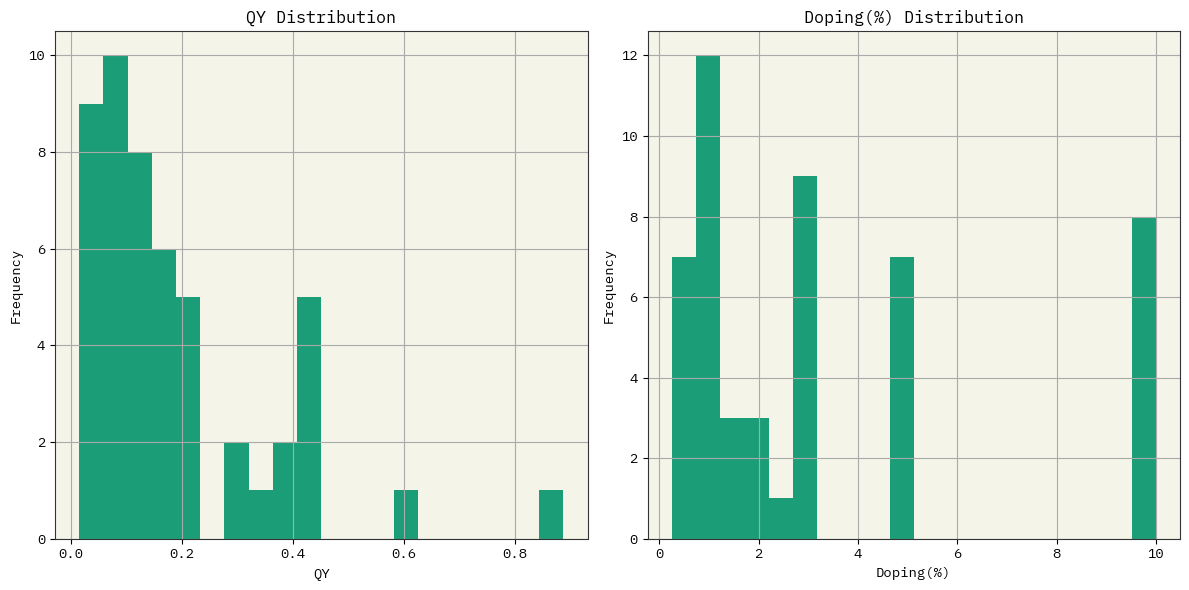

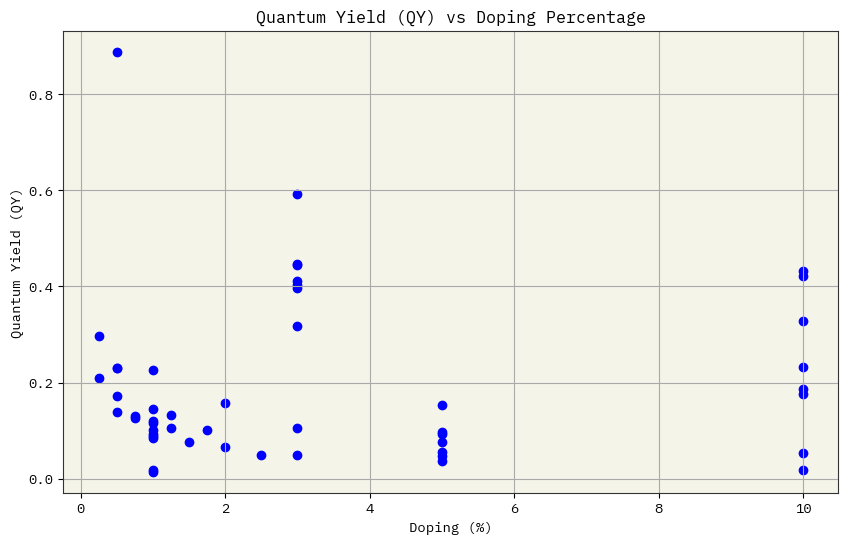

In [10]:
# Load and preprocess the data
df = pd.read_csv('Data/processed_datawobaselinev4.csv')
df.drop(['OD'], axis=1, inplace=True)
df = df[df['QY'] != -1]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot for QY distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
df['QY'].hist(bins=20)
plt.xlabel("QY")
plt.ylabel("Frequency")
plt.title("QY Distribution")

# Second subplot for Doping(%) distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
df['Doping(%)'].hist(bins=20)
plt.xlabel("Doping(%)")
plt.ylabel("Frequency")
plt.title("Doping(%) Distribution")

# Show the combined plot
plt.tight_layout()
plt.show()

# Optional: Add the scatter plot in a separate figure
plt.figure(figsize=(10, 6))
plt.scatter(df['Doping(%)'], df['QY'], color='blue')
plt.title('Quantum Yield (QY) vs Doping Percentage')
plt.xlabel('Doping (%)')
plt.ylabel('Quantum Yield (QY)')
plt.grid(True)
plt.show()

### Let's see some correlations between the features and our targets of interest

Index(['Dimension1(nm)', 'Dimension2(nm)', 'Dilution(%)', 'Nano_stock_vol(mL)',
       'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)', 'MeOH_vol(mL)',
       'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)', 'Temperature(C)',
       'Experiment', 'Peak1', 'Peak2', 'Area1', 'Area2', 'Pre-QY', 'QY',
       'QY_peak1', 'QY_peak2', 'Fl_Wavelengths', 'Fluorescence',
       'Fluorescence_norm', 'Abs_Wavelengths', 'Absorbance',
       'Absorbance_norm'],
      dtype='object')


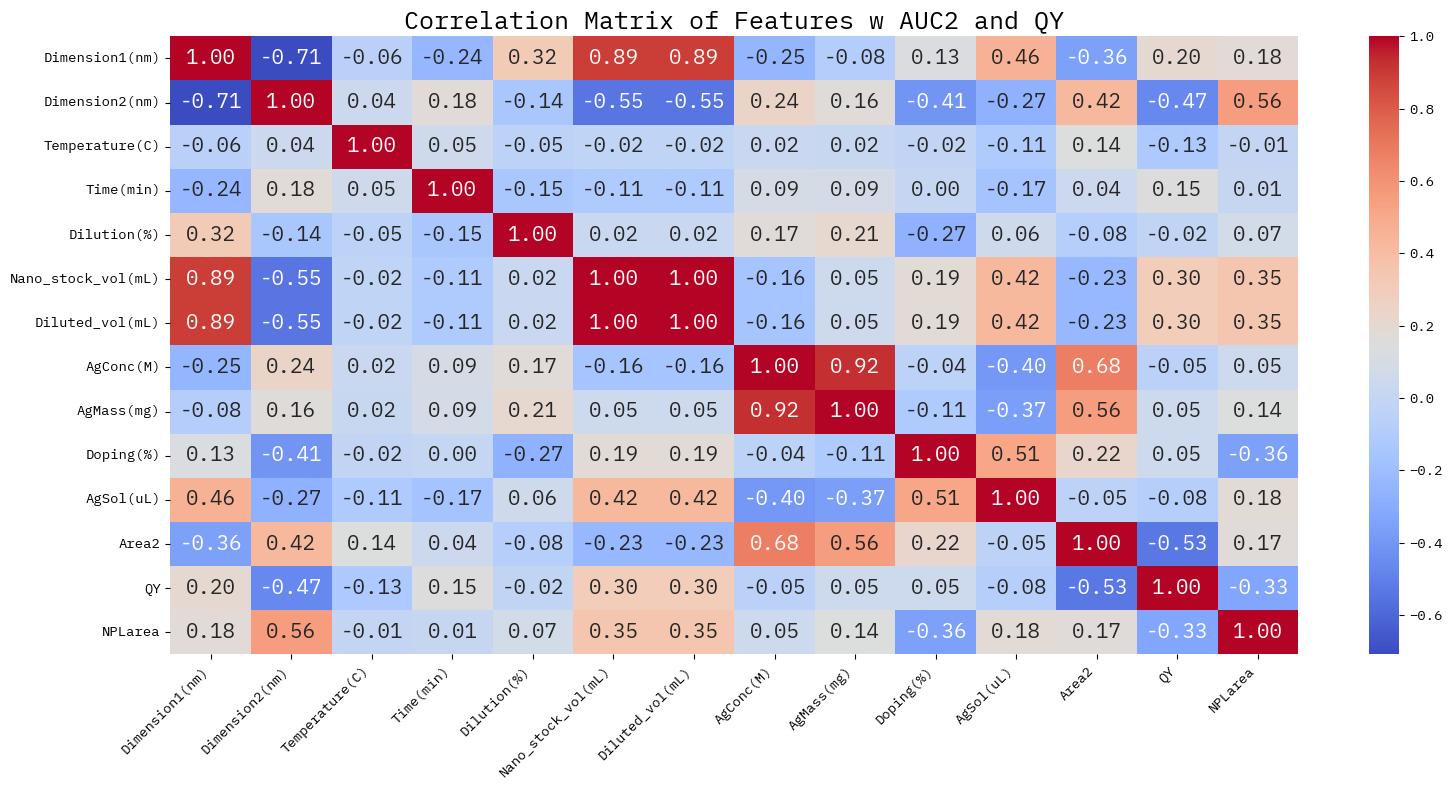

In [17]:

df = pd.read_csv('Data/processed_datawobaselinev4.csv')
df.drop(['OD'], axis=1, inplace=True)
df = df[df['QY'] != -1]
print(df.columns)
df2 = df[['Dimension1(nm)', 'Dimension2(nm)', 'Temperature(C)','Time(min)', 'Dilution(%)', 'Nano_stock_vol(mL)','Diluted_vol(mL)','AgConc(M)','AgMass(mg)','Doping(%)','AgSol(uL)','Area2','QY']].copy()
df2['NPLarea'] = df2['Dimension1(nm)'] * df2['Dimension2(nm)']
corr_matrix = df2.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(16, 8))

# Drawing the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
             annot_kws={"size": 15})

# Improving the layout
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Features w AUC2 and QY', fontsize=18)
plt.tight_layout()


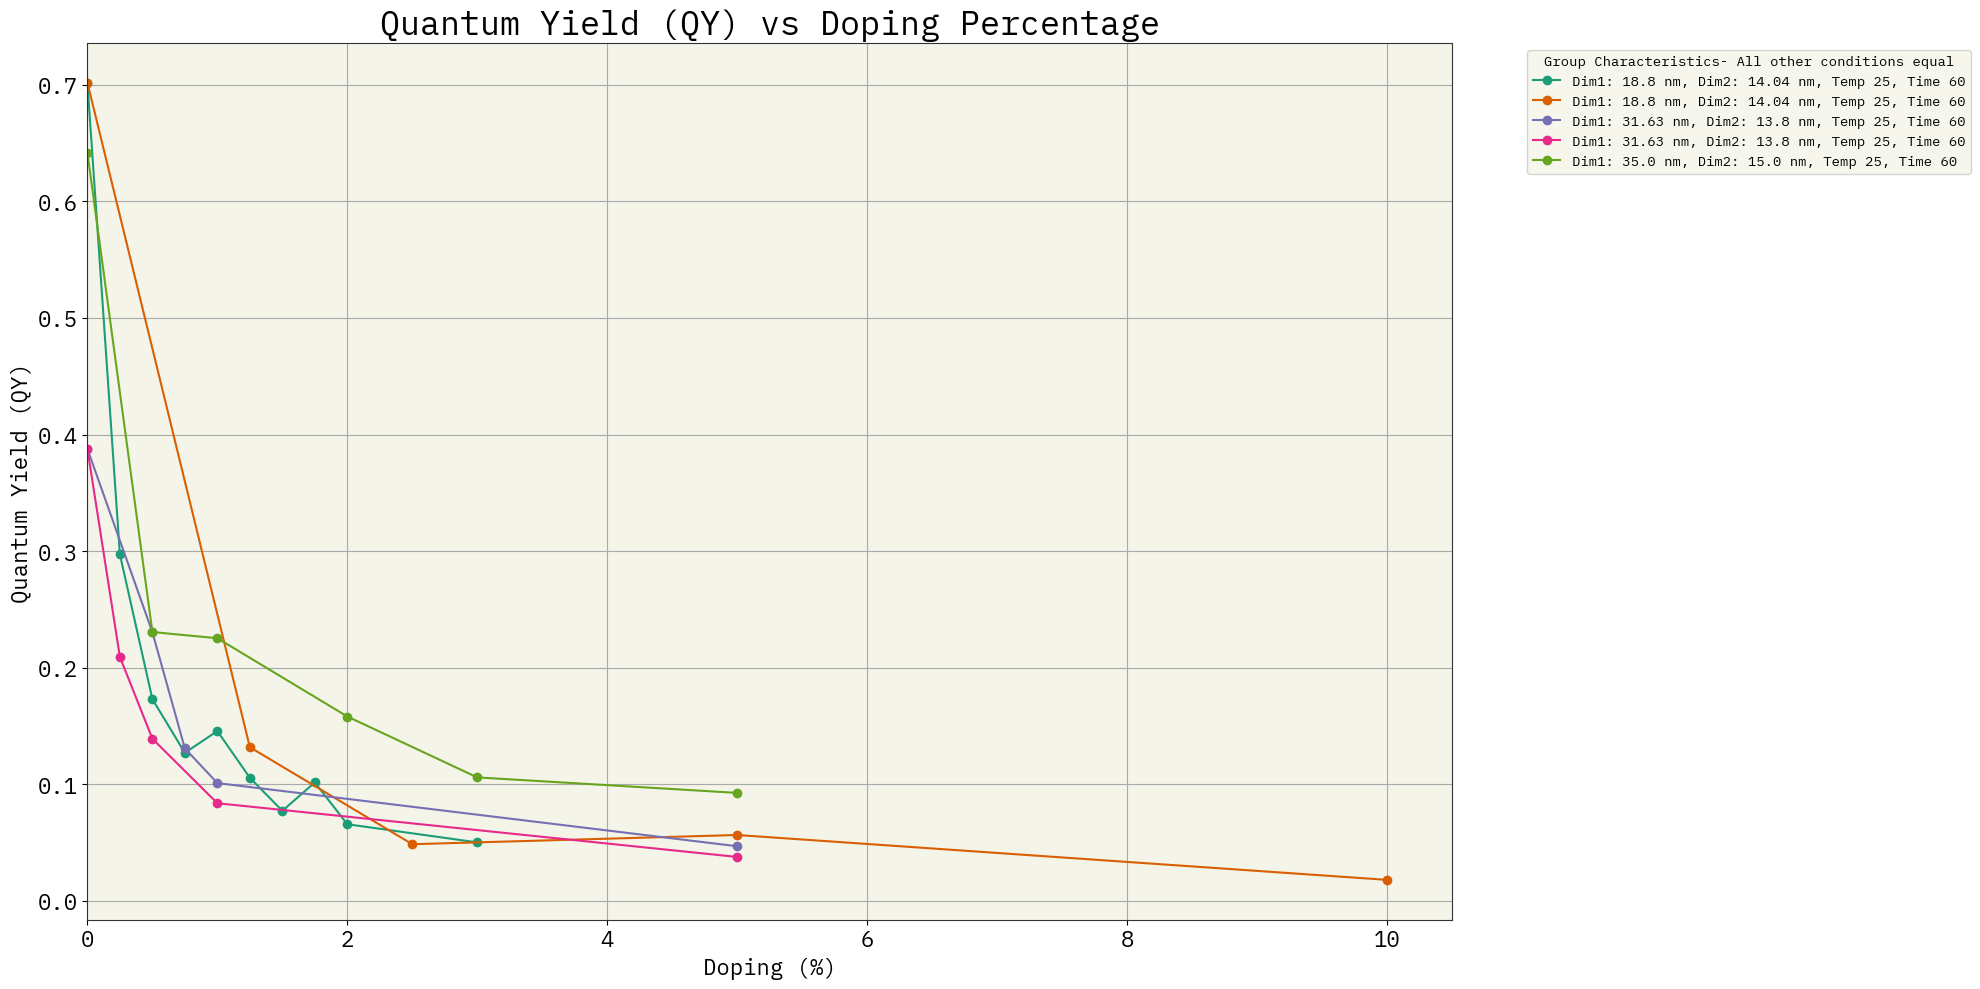

In [23]:
plt.figure(figsize=(20, 10))

legend_labels = {}
for name, group in df.groupby(['Dimension1(nm)', 'Dimension2(nm)', 'Temperature(C)', 
                                    'Time(min)', 'Dilution(%)', 'Nano_stock_vol(mL)','Diluted_vol(mL)','AgConc(M)','AgMass(mg)','MeOH_vol(mL)','H2O_vol(mL)']):
    if len(group) > 2:
        label = f"Dim1: {name[0]} nm, Dim2: {name[1]} nm, Temp {name[2]}, Time {name[3]}"
        #Add qy 0.7017409711126633 at 0% doping
        group_mod = group.copy()

        # Add a known value at 0% doping
        if name[0] == [18.8]:
            known_value = [0.7017409711126633]
        elif name[0] == [31.63]:
            known_value = [0.3876778610238423]
        elif name[0] == [35.0]:
            known_value = [0.6417238830491356]  # replace this with the actual known value

        new_row = pd.DataFrame({'Doping(%)': 0, 'QY': known_value})
        
        # Concatenate the new row with the existing DataFrame
        group_mod = pd.concat([new_row,group ], ignore_index=True)

        plt.plot(group_mod['Doping(%)'], group_mod['QY'], marker='o', label=label)
        legend_labels[label] = True
# Adding a legend
plt.legend(title="Group Characteristics- All other conditions equal", bbox_to_anchor=(1.05, 1), loc='upper left')
#increase size of Title, x and y labels
plt.title('Quantum Yield (QY) vs Doping Percentage', fontsize=24)
plt.xlabel('Doping (%)', fontsize=16)
plt.ylabel('Quantum Yield (QY)', fontsize=16)
#make it start at 0
plt.xlim(left=0)
plt.grid(True)
# Increase the size of the tick labels
plt.xticks(fontsize=16)  # Adjust the fontsize as needed
plt.yticks(fontsize=16)  # Adjust the fontsize as needed

plt.tight_layout()
plt.show()

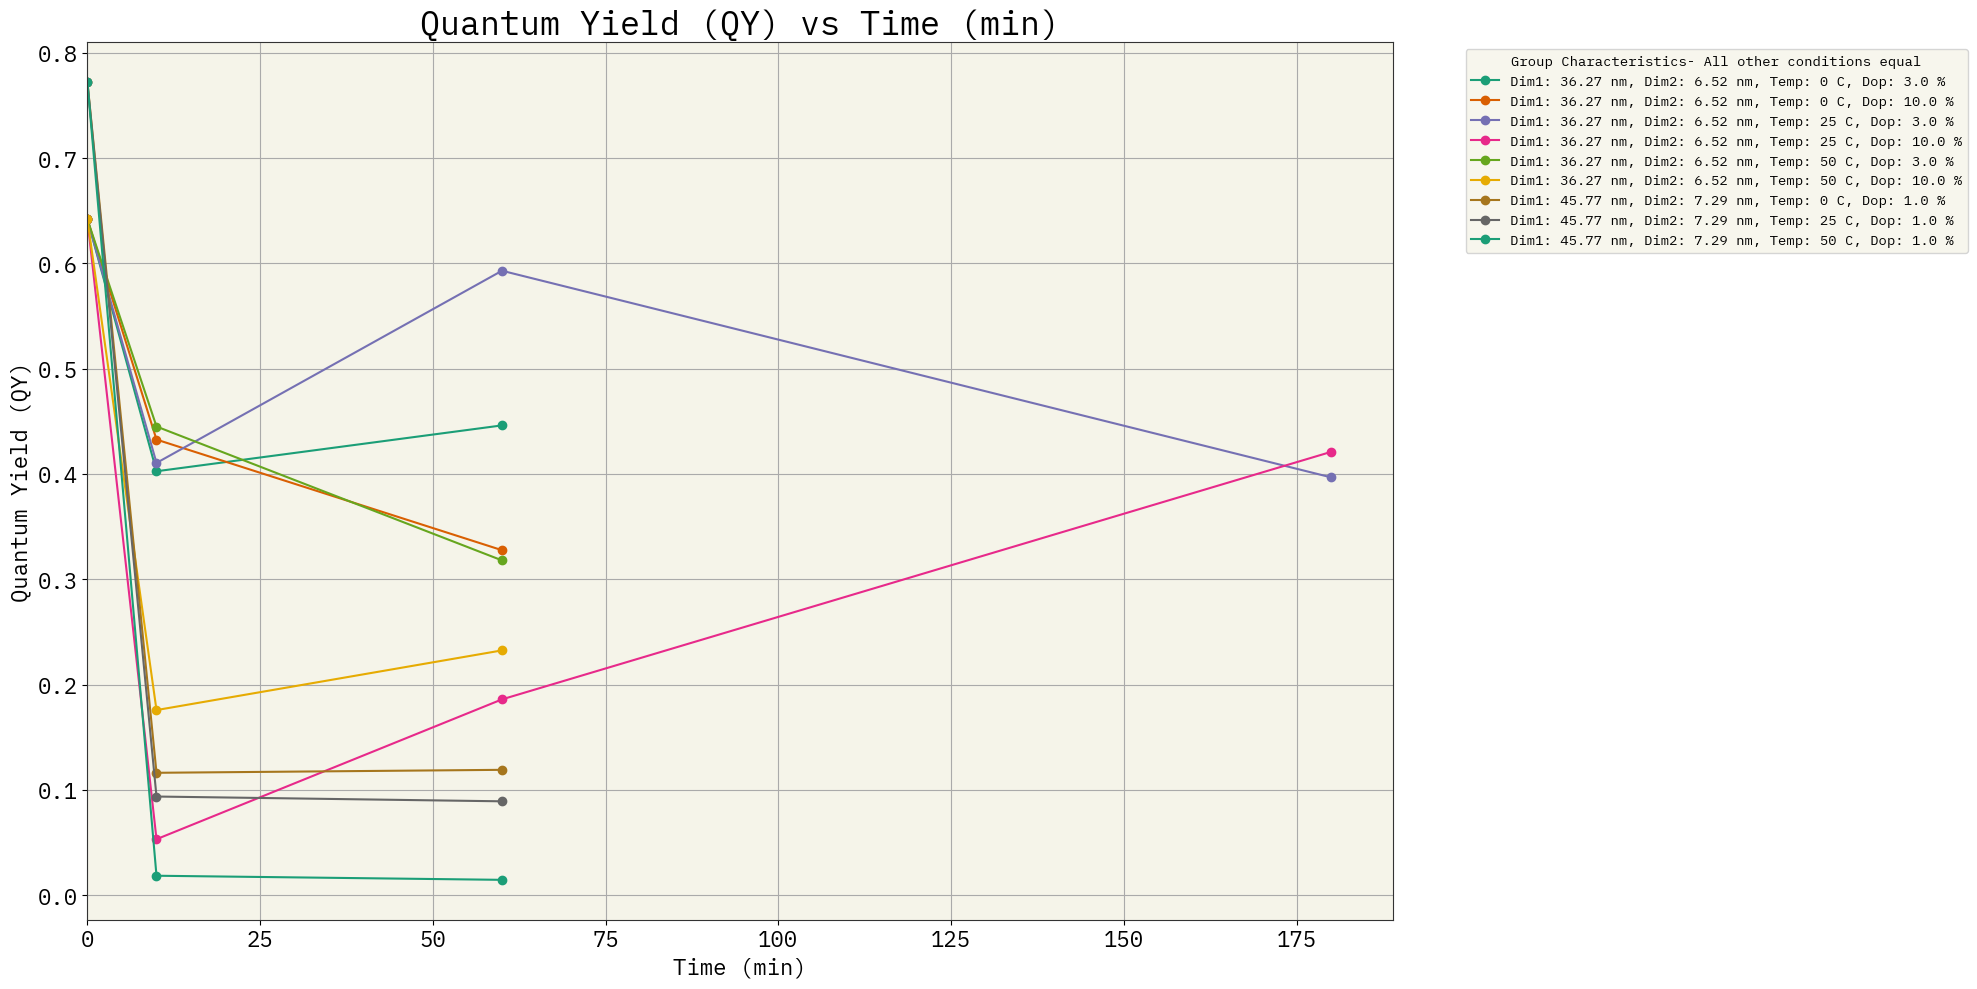

In [24]:
plt.figure(figsize=(20, 10))

legend_labels = {}
for name, group in df.groupby(['Dimension1(nm)', 'Dimension2(nm)', 'Temperature(C)','Doping(%)', 'Dilution(%)', 'Nano_stock_vol(mL)','Diluted_vol(mL)','AgConc(M)','AgMass(mg)','MeOH_vol(mL)','H2O_vol(mL)']):
    if len(group) > 1:
        label = f"Dim1: {name[0]} nm, Dim2: {name[1]} nm, Temp: {name[2]} C, Dop: {name[3]} %"
        #Add qy 0.7017409711126633 at 0% doping
        group_mod = group.copy()

        # Add a known value at 0% doping
        if name[0] == [18.8]:
            known_value = [0.7017409711126633]
        elif name[0] == [31.63]:
            known_value = [0.3876778610238423]
        elif name[0] == [35.0]:
            known_value = [0.6417238830491356]
        elif name[0] == [45.77]:
            known_value = [0.7719674211362035]  # replace this with the actual known value

        new_row = pd.DataFrame({'Time(min)': 0, 'QY': known_value})
        
        # Concatenate the new row with the existing DataFrame
        group_mod = pd.concat([new_row,group ], ignore_index=True)

        plt.plot(group_mod['Time(min)'], group_mod['QY'], marker='o', label=label)
        legend_labels[label] = True
# Adding a legend
plt.legend(title="Group Characteristics- All other conditions equal", bbox_to_anchor=(1.05, 1), loc='upper left')
#increase size of Title, x and y labels
plt.title('Quantum Yield (QY) vs Time (min)', fontsize=24)
plt.xlabel('Time (min)', fontsize=16)
plt.ylabel('Quantum Yield (QY)', fontsize=16)
#make it start at 0
plt.xlim(left=0)
plt.grid(True)
plt.xticks(fontsize=16)  # Adjust the fontsize as needed
plt.yticks(fontsize=16)  # Adjust the fontsize as needed

plt.tight_layout()
plt.show()